## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.599730  1.030494 -1.319719  0.904194 -1.315836  0.825300
1  0.616983  1.367921 -0.382473 -1.726875  0.408403 -0.530978
2 -0.831539  1.259652 -1.456128  1.202535  1.778666  1.822204
3 -0.436856  1.109811  1.673773 -0.804973 -0.893208  0.612706
4 -1.396845 -0.381465 -0.572398 -0.356595  1.331188 -0.877121


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0164729	total: 70.5ms	remaining: 1m 10s
1:	learn: 1.0086860	total: 72.2ms	remaining: 36s
2:	learn: 0.9981894	total: 73.9ms	remaining: 24.6s
3:	learn: 0.9892748	total: 75ms	remaining: 18.7s
4:	learn: 0.9809575	total: 75.6ms	remaining: 15s
5:	learn: 0.9723419	total: 76.1ms	remaining: 12.6s
6:	learn: 0.9600609	total: 76.5ms	remaining: 10.9s
7:	learn: 0.9487345	total: 77.1ms	remaining: 9.56s
8:	learn: 0.9395354	total: 77.5ms	remaining: 8.54s
9:	learn: 0.9298816	total: 78.1ms	remaining: 7.73s
10:	learn: 0.9201792	total: 78.5ms	remaining: 7.06s
11:	learn: 0.9085312	total: 78.9ms	remaining: 6.49s
12:	learn: 0.8990243	total: 79.3ms	remaining: 6.02s
13:	learn: 0.8886971	total: 79.7ms	remaining: 5.61s
14:	learn: 0.8810612	total: 80.1ms	remaining: 5.26s
15:	learn: 0.8733533	total: 80.4ms	remaining: 4.95s
16:	learn: 0.8657475	total: 80.8ms	remaining: 4.67s
17:	learn: 0.8566834	total: 81.3ms	remaining: 4.43s
18:	learn: 0.8474836	total: 81.6ms	remaining: 4.2

82:	learn: 0.4813491	total: 107ms	remaining: 1.19s
83:	learn: 0.4773249	total: 108ms	remaining: 1.18s
84:	learn: 0.4735854	total: 108ms	remaining: 1.17s
85:	learn: 0.4692758	total: 109ms	remaining: 1.15s
86:	learn: 0.4659165	total: 109ms	remaining: 1.14s
87:	learn: 0.4623288	total: 110ms	remaining: 1.14s
88:	learn: 0.4583426	total: 110ms	remaining: 1.12s
89:	learn: 0.4554592	total: 110ms	remaining: 1.11s
90:	learn: 0.4517128	total: 111ms	remaining: 1.1s
91:	learn: 0.4476305	total: 111ms	remaining: 1.1s
92:	learn: 0.4439849	total: 112ms	remaining: 1.09s
93:	learn: 0.4396588	total: 112ms	remaining: 1.08s
94:	learn: 0.4360247	total: 112ms	remaining: 1.07s
95:	learn: 0.4328315	total: 113ms	remaining: 1.06s
96:	learn: 0.4297610	total: 114ms	remaining: 1.06s
97:	learn: 0.4262741	total: 114ms	remaining: 1.05s
98:	learn: 0.4231821	total: 114ms	remaining: 1.04s
99:	learn: 0.4202929	total: 115ms	remaining: 1.03s
100:	learn: 0.4181376	total: 115ms	remaining: 1.02s
101:	learn: 0.4147930	total: 116

256:	learn: 0.1377037	total: 187ms	remaining: 540ms
257:	learn: 0.1366250	total: 187ms	remaining: 539ms
258:	learn: 0.1356031	total: 188ms	remaining: 537ms
259:	learn: 0.1350007	total: 188ms	remaining: 536ms
260:	learn: 0.1343744	total: 189ms	remaining: 534ms
261:	learn: 0.1334678	total: 189ms	remaining: 533ms
262:	learn: 0.1325984	total: 190ms	remaining: 532ms
263:	learn: 0.1317378	total: 190ms	remaining: 531ms
264:	learn: 0.1308969	total: 191ms	remaining: 529ms
265:	learn: 0.1301540	total: 191ms	remaining: 528ms
266:	learn: 0.1293566	total: 192ms	remaining: 527ms
267:	learn: 0.1285950	total: 193ms	remaining: 526ms
268:	learn: 0.1277370	total: 193ms	remaining: 525ms
269:	learn: 0.1268138	total: 194ms	remaining: 524ms
270:	learn: 0.1259588	total: 194ms	remaining: 523ms
271:	learn: 0.1251303	total: 195ms	remaining: 521ms
272:	learn: 0.1242201	total: 195ms	remaining: 520ms
273:	learn: 0.1235555	total: 196ms	remaining: 519ms
274:	learn: 0.1227435	total: 196ms	remaining: 517ms
275:	learn: 

472:	learn: 0.0461185	total: 291ms	remaining: 324ms
473:	learn: 0.0457732	total: 291ms	remaining: 323ms
474:	learn: 0.0455231	total: 292ms	remaining: 323ms
475:	learn: 0.0451862	total: 292ms	remaining: 322ms
476:	learn: 0.0449441	total: 293ms	remaining: 321ms
477:	learn: 0.0446429	total: 293ms	remaining: 320ms
478:	learn: 0.0443483	total: 294ms	remaining: 320ms
479:	learn: 0.0440242	total: 294ms	remaining: 319ms
480:	learn: 0.0437719	total: 295ms	remaining: 318ms
481:	learn: 0.0434873	total: 295ms	remaining: 317ms
482:	learn: 0.0431744	total: 296ms	remaining: 317ms
483:	learn: 0.0429494	total: 296ms	remaining: 316ms
484:	learn: 0.0427406	total: 297ms	remaining: 315ms
485:	learn: 0.0424374	total: 297ms	remaining: 314ms
486:	learn: 0.0421995	total: 298ms	remaining: 314ms
487:	learn: 0.0420201	total: 298ms	remaining: 313ms
488:	learn: 0.0419304	total: 298ms	remaining: 312ms
489:	learn: 0.0417104	total: 299ms	remaining: 311ms
490:	learn: 0.0415991	total: 299ms	remaining: 310ms
491:	learn: 

647:	learn: 0.0237165	total: 370ms	remaining: 201ms
648:	learn: 0.0236562	total: 370ms	remaining: 200ms
649:	learn: 0.0235761	total: 371ms	remaining: 200ms
650:	learn: 0.0234881	total: 371ms	remaining: 199ms
651:	learn: 0.0233987	total: 372ms	remaining: 198ms
652:	learn: 0.0232925	total: 372ms	remaining: 198ms
653:	learn: 0.0231621	total: 373ms	remaining: 197ms
654:	learn: 0.0230757	total: 373ms	remaining: 196ms
655:	learn: 0.0229914	total: 374ms	remaining: 196ms
656:	learn: 0.0228744	total: 374ms	remaining: 195ms
657:	learn: 0.0228001	total: 374ms	remaining: 195ms
658:	learn: 0.0227154	total: 375ms	remaining: 194ms
659:	learn: 0.0226597	total: 375ms	remaining: 193ms
660:	learn: 0.0225482	total: 376ms	remaining: 193ms
661:	learn: 0.0224661	total: 376ms	remaining: 192ms
662:	learn: 0.0224120	total: 377ms	remaining: 191ms
663:	learn: 0.0223424	total: 377ms	remaining: 191ms
664:	learn: 0.0222190	total: 377ms	remaining: 190ms
665:	learn: 0.0221135	total: 378ms	remaining: 190ms
666:	learn: 

866:	learn: 0.0123518	total: 474ms	remaining: 72.7ms
867:	learn: 0.0122716	total: 474ms	remaining: 72.1ms
868:	learn: 0.0122211	total: 475ms	remaining: 71.6ms
869:	learn: 0.0121488	total: 475ms	remaining: 71ms
870:	learn: 0.0121231	total: 476ms	remaining: 70.4ms
871:	learn: 0.0120599	total: 476ms	remaining: 69.9ms
872:	learn: 0.0120298	total: 476ms	remaining: 69.3ms
873:	learn: 0.0120048	total: 477ms	remaining: 68.7ms
874:	learn: 0.0119753	total: 477ms	remaining: 68.2ms
875:	learn: 0.0119589	total: 478ms	remaining: 67.6ms
876:	learn: 0.0119105	total: 478ms	remaining: 67.1ms
877:	learn: 0.0118882	total: 479ms	remaining: 66.5ms
878:	learn: 0.0118442	total: 479ms	remaining: 66ms
879:	learn: 0.0117970	total: 480ms	remaining: 65.4ms
880:	learn: 0.0117500	total: 480ms	remaining: 64.9ms
881:	learn: 0.0117041	total: 481ms	remaining: 64.3ms
882:	learn: 0.0116826	total: 481ms	remaining: 63.8ms
883:	learn: 0.0116397	total: 482ms	remaining: 63.2ms
884:	learn: 0.0115936	total: 482ms	remaining: 62.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

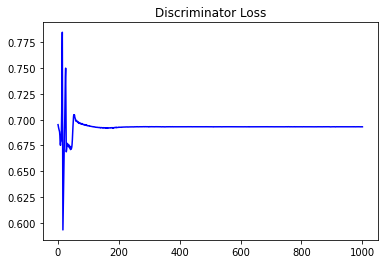

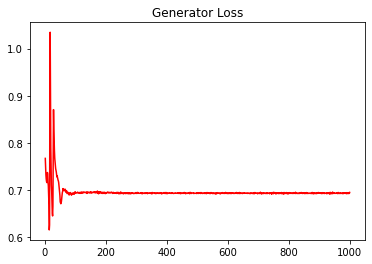

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12398118153378372


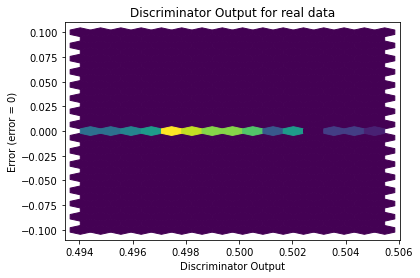

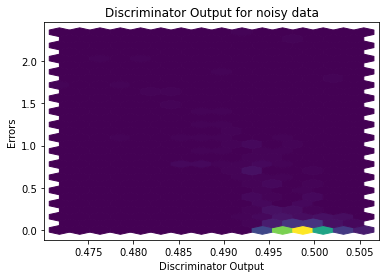

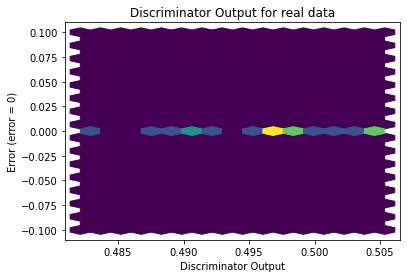

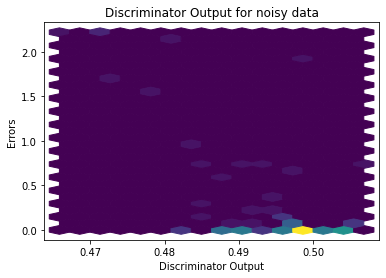

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


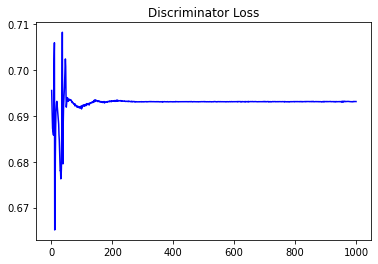

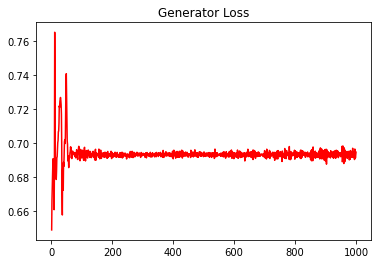

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1447180380507236


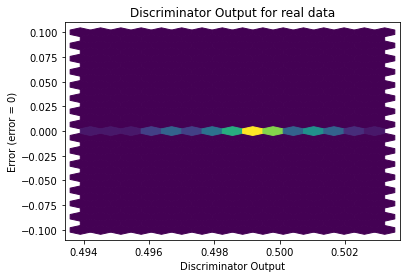

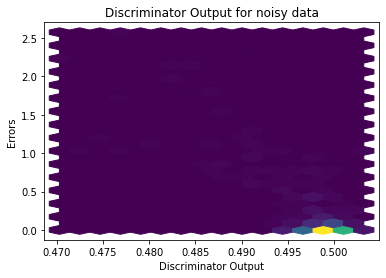

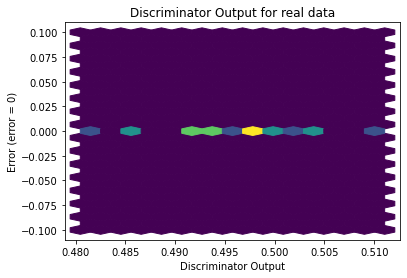

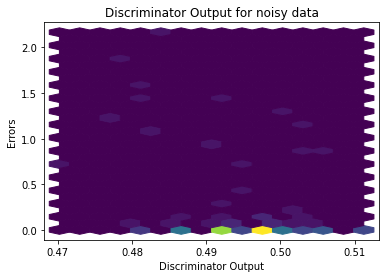

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4488]], requires_grad=True)
